# Numpy

## Introducción

### Es el paquete fundamental para hacer cálculo científico en python

* Manejo de arreglos numéricos N-dimensionales
* Muchas funciones numéricas que aplican sobre los arreglos
* Funciones básicas de álgebra lineal
* Transformada de fourier básica
* Capacidad de generación de números aleatorios, MUCHAS y complejas
* Herramientas para integrarse con código FORTRAN
* Herramientas para integrarse con código C/C++
* Optimizable en velocidad. Numpy es rápido, pero se puede mejorar con Cython.

### Comparación con Matlab

#### Válida si se usa Matlab (pero aparece muchas veces)

* Gratis y libre (Free)
* Hay un tipo matriz que es una subclase del tipo array
* Mayor potencia de programación
* Numpy/Scipy no tiene tantos toolboxes específicos
* Hay paquetes de graficación
* No hay un Simulink, aunque algo se puede hacer
* Hay ayudas para migrar código de Matlab a Numpy

In [1]:
import numpy as np
import matplotlib.pyplot as plt


%matplotlib inline

## Arreglo Unidimensional

$a = \begin{pmatrix}a_1 a_2  \cdots  a_n\end{pmatrix}$

## Creación de arrays

### refs 
* Array creation routines [link](http://docs.scipy.org/doc/numpy/reference/routines.array-creation.html)

3 2 int32 float32
[ 1.   1.6  2.2  2.8  3.4  4. ]
[ 0.  0.  0.  0.  0.]
[ 1.  1.  1.  1.  1.]

[[ 1.  1.  1.]
 [ 1.  1.  1.]] (2, 3) 2 3

[[ 1.  1.  1.  1.]
 [ 1.  1.  1.  1.]
 [ 1.  1.  1.  1.]
 [ 1.  1.  1.  1.]]

 arange 
 [0 1 2 3 4 5]

 ones_like 
 [[1 1 1]
 [1 1 1]]


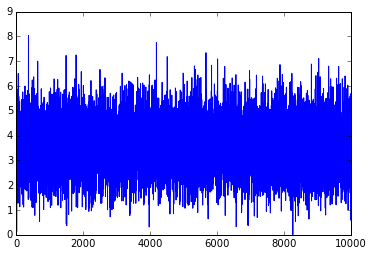

In [13]:
# inicialización manual de un array 1D
a = np.array([1, 2, 3, 4, 5, 6, 7, np.pi, 9, np.e], dtype=np.float64)
b = np.array([1, 2, 3, 4, 5, 6, 7, np.pi, 9, np.e], dtype=np.float32)
c = np.array([1, 2, 3, 4, 5, 6, 7, np.pi, 9, np.e], dtype=np.int32)
d = np.array([1, 2, 3, 4, 5, 6, 7, np.pi, 9, np.e], dtype=np.int64)

print(c[7], c[9], c.dtype, b.dtype)

e = np.linspace(1., 4., 6)

print(e)

z = np.zeros(5)

print(z)

o = np.ones(5)

print(o)

# array 2D
o2d = np.ones(2*3).reshape(2,3)

print ()
sh = o2d.shape
(r, c) = o2d.shape
print(o2d, sh, r, c)

shape = (4,4)

o2d = np.ones(shape)
print()
print(o2d)

x = np.arange(6)
print("\n arange \n", x)
x = x.reshape((2, 3))

xx = np.ones_like(x)

print("\n ones_like \n", xx)

zx = np.random.normal(0, 1, size = 100 * 100)
zx = zx + np.abs(zx.min())

plt.plot(zx)



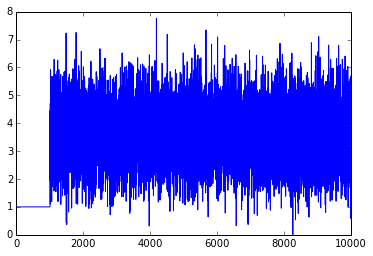

In [14]:
zx[:1000] = 0
zx[:1000] = 1
plt.plot(zx)

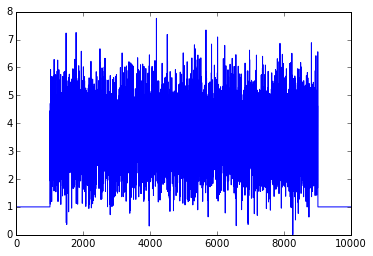

In [15]:
zx[9000:] = 0
zx[9000:] = 1
plt.plot(zx)

0.0 7.75701411089 3.10496099916
0.0 255.0 48.7245554954


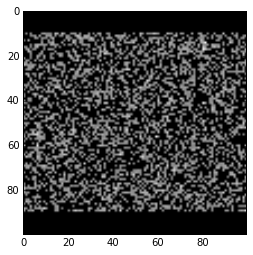

In [16]:

print(zx.min(), zx.max(), zx.mean())


zx = zx.reshape(100, 100)
zx = zx * 255 / zx.max()

zx[zx < (zx.min() + zx.max())/2.0] = 0

print(zx.min(), zx.max(), zx.mean())

plt.gray()
plt.imshow(zx)



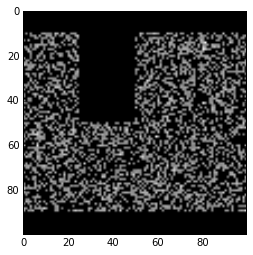

In [17]:
zx[0:50, 25:50] = 0
plt.imshow(zx)

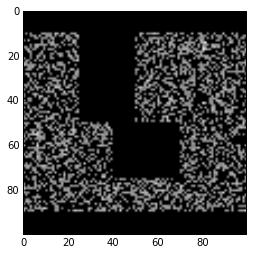

In [18]:
zx[50:75, 40:70] = 0
plt.imshow(zx)

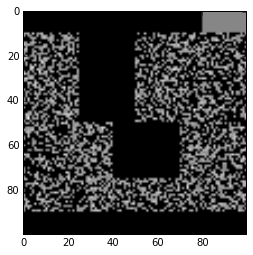

In [130]:
zx [0:10, 80:100] = 127
plt.imshow(zx)

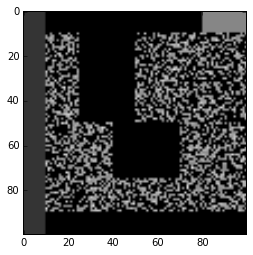

In [131]:
zx [0:100, 0:10] = 50
plt.imshow(zx)

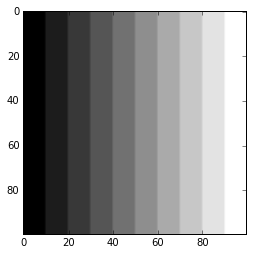

In [132]:
for i in range(10):
    zx[0:100, i*10:(i+1)*10] = i * 28.33
plt.imshow(zx)

# ver este copy
yx = np.copy(zx)

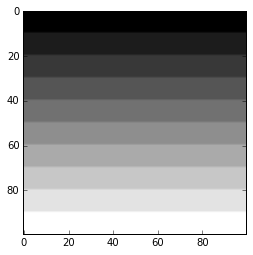

In [133]:
for i in range(10):
    zx[i*10:(i+1)*10, 0:100] = i * 28.33
plt.imshow(zx) 

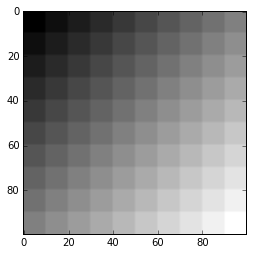

In [134]:
zx = zx/2 + yx/2
plt.imshow(zx)

0.0 255.0


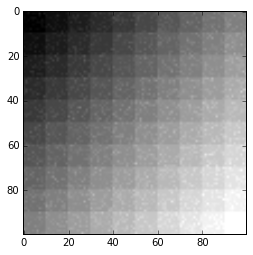

In [135]:
noise = np.random.normal(0, 10, size = 100*100).reshape(100,100)
noise[noise < 0] = 0
zx = zx + noise
zx[zx>255] = 255
print(zx.min(), zx.max())
plt.imshow(zx)

(0.0, 254.96999999999997, 127.485, 127.48499999999999)
(0.0, 254.96999999999997, 127.485, 127.48499999999999)
(0.0, 254.96999999999997, 127.485, 127.48499999999999)


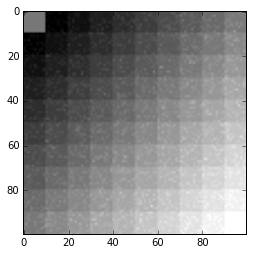

In [28]:
class damero():
    def __init__(self, w=100, h=100, i=255):
        self.h = h
        self.w = w 
        self.img = i * np.ones(100*100).reshape(w,h)

    def vertical_bars(self):
        self.img *= 0
        for i in range(10):
            self.img[0:100, i*10:(i+1)*10] = i * 28.33

    def horizontal_bars(self):
        self.img *= 0
        for i in range(10):
            self.img[i*10:(i+1)*10, 0:100] = i * 28.33
    
    def sum(self, damero, p=0.5):
        damero.img *= p
        self.img = self.img * (1 - p) + damero.img
        
    def stats(self):
        return (self.img.min(), self.img.max(), self.img.mean(), np.median(self.img))
    
    def show(self):
        plt.gray()
        plt.imshow(self.img)
        
    def add_normal_noise(self, l=0, v=10):
        noise = np.random.normal(l, v, size = self.w * self.h).reshape(self.w,self.h)
        noise[noise < 0] = 0
        self.img = self.img + noise
        self.img[self.img > 255] = 255
        
    def set_nivel_cuadro(self, f=0, c=0, l=255):
        self.img[f*10:(f+1)*10, c*10:(c+1)*10] = l
        
d1 = damero ()
d2 = damero()
d1.horizontal_bars()
d2.vertical_bars()
print (d1.stats())
print (d2.stats())
d1.sum(d2)
print (d1.stats())
d1.add_normal_noise()
d1.set_nivel_cuadro(0, 0, 127)
d1.show()

# Indexado

los ndarrays se pueden indexar usando la notación x[obj], donde x es el array y obj, la selección. Existen 3 tipos de indexado, slicing básico, indexado avanzado y acceso a registro.
El tipo de indexado depende del tipo de obj.

## Indexado básico

obj es un objeto tipo slice construído con (start:stop:step)


In [9]:
# start: 1, stop: 7, step: 2
print(a[1:7:2])

[ 2.  4.  6.]


In [6]:
# Devuelve los primeros 2 elementos de a
# implícito el comienzo en el principio
# implícito el paso de 1
print(a[:2])

[ 1.  2.]


In [7]:
#Devuelve a salvo los 2 primeros elementos del array a
print(a[2:])

[ 3.          4.          5.          6.          7.          3.14159265
  9.          2.71828183]


In [10]:
#Devuelve los 2 últimos elementos de a
print(a[-2:])

[ 9.          2.71828183]


In [11]:
#Devuelve a menos los 2 últimos elementos
print(a[:-2])

[ 1.          2.          3.          4.          5.          6.          7.
  3.14159265]


In [12]:
# Devuelve 1 menos los 2 primeros y los 2 últimos
print(a[2:-2])

[ 3.          4.          5.          6.          7.          3.14159265]


In [13]:
# Devuelve desde el índice 3 hasta el 6 (incluye el 5 y no el 6)
print(a[3:6])

[ 4.  5.  6.]


In [14]:
# El contenido de un lugar asignado a una variable
x = a[5]
print("a[5]", x)

a[5] 6.0


In [19]:
# Cambiar el valor en un lugar del arreglo
a[5] = 8
print (("%6.2f %6.2f")%(x, a [5]))

  6.00   8.00


## Indexado avanzado

### Se reconoce por la  la coma en obj  x[(1,2,3),]

en indexado básico tenemos x[(1,2,3)], que es equivalente a x[1,2,3]

Esto x[[1,2,3]] dispara indexado avanzado, mientras que x[[1,2,slice(None)]] lleva al básico



## slicing multidimensional

In [113]:
a =np.array([[1,2,3],[4,5,6],[7,8,9]])
print("fila 1")
print(a[0:1])
print(a[0:1][0:2])

print("un elemento")
# equivalentes
print(a[1][2])
print(a[1, 2])

print("2 filas, 3 columnas")
print(a[0:2,0:3])
print()
print(a[0:2])
print()
print(a[0:2,:])

print("columna 0")
print(a[...,0])
print(a[:,0])
print()

print("fila 0")
print(a[0,...])
print(a[0,:])


fila 1
[[1 2 3]]
[[1 2 3]]
un elemento
6
6
2 filas, 3 columnas
[[1 2 3]
 [4 5 6]]

[[1 2 3]
 [4 5 6]]

[[1 2 3]
 [4 5 6]]
columna 0
[1 4 7]
[1 4 7]

fila 0
[1 2 3]
[1 2 3]


## Indexado booleano

In [94]:
b = a > 1
print(b)
a[b]=0
print(a)

[[False  True  True]
 [ True  True  True]
 [ True  True  True]]
[[1 0 0]
 [0 0 0]
 [0 0 0]]


## Operaciones básicas sobre arreglos

$ s = \sum_{i=0}^{n-1} a_i $

In [84]:
# suma de todos los elementos del array
# existen 2 maneras de hacerlo
a.sum()
np.sum(a)



7200.0

$ s = \prod_{i=0}^{n-1} a_i $

In [85]:
# la multiplicación del todos los elementos
a.prod()
np.prod(a)

7200.0

## Funciones estadísticas

In [20]:
# mediana media, varianza, desviación standard, mínimo y máximo de un array
np.median(a), a.mean(), a.var(), a.std(), a.min(), a.max()

(3.5707963267948966,
 4.4859874482048836,
 6.5017826645502357,
 2.5498593421109006,
 1.0,
 9.0)

In [26]:
# posición del mínimo y posición del máximo
s =("%f %f" % (a.argmin(), a.argmax()))
print(s)

0.000000 4.000000


In [30]:
# Ordenar arreglos
a = np.array([6, 2, 5, -1, 0], float)
# devuelve una lista
b = sorted (a)
print (b, type(b))
# Usar este y queda todo como array numpy
a.sort()
print(a, type(a))

[-1.0, 0.0, 2.0, 5.0, 6.0] <class 'list'>
[-1.  0.  2.  5.  6.] <class 'numpy.ndarray'>


In [31]:
# recortar en rango
a.clip(0,5)

array([ 0.,  0.,  2.,  5.,  5.])

In [102]:
# elementos únicos
a = np.array([1, 1, 4, 5, 5, 5, 7], float)
np.unique(a)


array([ 1.,  4.,  5.,  7.])

In [103]:
# elementos diagonales de un arreglo 2D
a = np.array([[1, 2], [3, 4]], float)
a.diagonal()


array([ 1.,  4.])

### Comparación de arreglos

In [107]:
a = np.array([1, 3, 0], float)
b = np.array([0, 3, 2], float)
a>b, a == b, a<=b

(array([ True, False, False], dtype=bool),
 array([False,  True, False], dtype=bool),
 array([False,  True,  True], dtype=bool))

In [108]:
c = a>b
c

array([ True, False, False], dtype=bool)

In [109]:
# Expresiones booleanas compuestas aplicadas elemento por elemento
a = np.array([1, 3, 0], float)
np.logical_and(a > 0, a < 3)


array([ True, False, False], dtype=bool)

In [110]:
b = np.array([True, False, True], bool)
np.logical_not(b)

array([False,  True, False], dtype=bool)

In [111]:
c = np.array([False, True, False], bool)
np.logical_or(b, c)


array([ True,  True,  True], dtype=bool)

#### La función where

In [116]:
# sintáxis básica where(boolarray,truearray, falsearray)

a = np.array([1, 3, 0], float)
np.where(a != 0, 1 / a, a)


array([ 1.        ,  0.33333333,  0.        ])

#### Elementos no nulos

In [117]:
a = np.array([[0, 1], [3, 0]], float)
a.nonzero()

(array([0, 1], dtype=int32), array([1, 0], dtype=int32))

### Selección y manipulación de items de un arreglo

In [118]:
a = np.array([[6, 4], [5, 9]], float)
a[a >= 6]

array([ 6.,  9.])

In [119]:
a = np.array([[6, 4], [5, 9]], float)
sel = a >= 6 
a[sel]

array([ 6.,  9.])

In [120]:
#usando expresiones booleanas
a[np.logical_and(a > 5, a < 9)]

array([ 6.])

In [121]:
# selección usando arreglos de enteros

# defino los valores  a 
a = np.array([2, 4, 6, 8], float)
# defino los índices b 
b = np.array([0, 0, 1, 3, 2, 1], int)
a[b]

array([ 2.,  2.,  4.,  8.,  6.,  4.])

In [122]:
# Igual a lo anterior con listas
a = np.array([2, 4, 6, 8], float)
lista = [0, 0, 1, 3, 2, 1]
a[lista]

array([ 2.,  2.,  4.,  8.,  6.,  4.])

In [123]:
# arreglo multidimensional

a = np.array([[1, 4], [9, 16]], float)
b = np.array([0, 0, 1, 1, 0], int)
c = np.array([0, 1, 1, 1, 1], int)
a[b,c]


array([  1.,   4.,  16.,  16.,   4.])

## Vectores y matríces

### Producto escalar de 2 vectores

$\begin{align}
\mathbf{a}\cdot\mathbf{b} =\mathbf{a}^\mathrm{T}\mathbf{b}\\
=\begin{pmatrix}a_1 a_2  \cdots  a_n\end{pmatrix}\begin{pmatrix}b_1 \\ b_2 \\ \vdots \\ b_n\end{pmatrix}\\
=a_1b_1+a_2b_2+\cdots+a_nb_n\\
=\sum_{i=1}^n a_ib_i,
\end{align}$

In [23]:
# operador dot
a = np.array([1, 2, 3], float)
b = np.array([0, 1, 1], float)
np.dot(a, b)

5.0

### Producto de 2 matríces

$ \mathbf{A} =
\begin{pmatrix}
A_{1 1}   A_{1 2}  \cdots  A_{1 m} \\
A_{2 1}  A_{2 2}  \cdots  A_{2 m} \\
\vdots  \vdots  \ddots  \vdots \\
A_{n 1}  A_{n 2}  \cdots  A_{n m}
\end{pmatrix} =  \begin{pmatrix}
\mathbf{a}_1 \\ \mathbf{a}_2 \\ \vdots \\ \mathbf{a}_n
\end{pmatrix} $

$\mathbf{A} =
\begin{pmatrix}
A_{1 1}  A_{1 2}  \cdots  A_{1 m} \\
A_{2 1}  A_{2 2}  \cdots  A_{2 m} \\
\vdots  \vdots  \ddots  \vdots \\
A_{n 1}  A_{n 2}  \cdots  A_{n m}
\end{pmatrix} =  \begin{pmatrix}
\mathbf{a}_1 \\ \mathbf{a}_2 \\ \vdots \\ \mathbf{a}_n
\end{pmatrix}$

Donde

$\mathbf{a}_i = \begin{pmatrix}A_{i1}  A_{i2}  \cdots  A_{im} \end{pmatrix}\,,\quad \mathbf{b}_i = \begin{pmatrix}B_{1i} \\ B_{2i} \\ \vdots \\ B_{mi}\end{pmatrix}$

Entonces: 

$\mathbf{AB} =
\begin{pmatrix}
\mathbf{a}_1 \\
\mathbf{a}_2 \\
\vdots \\
\mathbf{a}_n
\end{pmatrix} \begin{pmatrix} \mathbf{b}_1  \mathbf{b}_2  \dots  \mathbf{b}_p
\end{pmatrix} = \begin{pmatrix}
(\mathbf{a}_1 \cdot \mathbf{b}_1)  (\mathbf{a}_1 \cdot \mathbf{b}_2)  \dots (\mathbf{a}_1 \cdot \mathbf{b}_p) \\
(\mathbf{a}_2 \cdot \mathbf{b}_1)  (\mathbf{a}_2 \cdot \mathbf{b}_2)   \dots   (\mathbf{a}_2 \cdot \mathbf{b}_p) \\
\vdots   \vdots   \ddots  \vdots \\
(\mathbf{a}_n \cdot \mathbf{b}_1)  (\mathbf{a}_n \cdot \mathbf{b}_2)   \dots (\mathbf{a}_n \cdot \mathbf{b}_p)
\end{pmatrix}$

In [27]:
# operador dot
a = np.array([[0, 1], [2, 3]], float)
c = np.array([[1, 1], [4, 0]], float)
#multiplicar una matriz por un vector
np.dot(a,c), np.dot(c,a)


(array([[  4.,   0.],
        [ 14.,   2.]]), array([[ 2.,  4.],
        [ 0.,  4.]]))

## Producto de una matríz por un vector

$ \mathbf{A}\mathbf{b}$

$ \begin{pmatrix}
A_{1 1}   A_{1 2}  \cdots  A_{1 m} \\
A_{2 1}  A_{2 2}  \cdots  A_{2 m} \\
\vdots  \vdots  \ddots  \vdots \\
A_{n 1}  A_{n 2}  \cdots  A_{n m}
\end{pmatrix} \begin{pmatrix}b_1 \\ b_2 \\ \vdots \\ b_n\end{pmatrix}$

In [28]:
# operador dot
a = np.array([[0, 1], [2, 3]], float)
b = np.array([2, 3], float)
np.dot(a,b), 

(array([  3.,  13.]),)

## Producto tensorial

$ \mathbf{a}\otimes\mathbf{b} = \mathbf{a}\mathbf{b}^\mathrm{T} =$

$ \begin{pmatrix}a_1 \\ a_2 \\ \vdots \\ a_n\end{pmatrix}
\begin{pmatrix}b_1  b_2  \cdots  b_n\end{pmatrix} =$

$ \begin{pmatrix}
a_1 b_1  a_1 b_2 \cdots  a_1 b_n \\
a_2 b_1  a_2 b_2  \cdots  a_2 b_n \\
\vdots  \vdots  \ddots  \vdots \\
a_n b_1  a_n b_2  \cdots  a_n b_n \\
\end{pmatrix} $

In [29]:
# outer product

a = np.array([1, 4, 0], float)
b = np.array([2, 2, 1], float)
np.outer(a, b)


array([[ 2.,  2.,  1.],
       [ 8.,  8.,  4.],
       [ 0.,  0.,  0.]])

## Cálculos con el paquete de álgebra lineal

###### Se usa el sub-paquete de linalg de numpy

### determinante

In [30]:
a = np.array([[4, 2, 0], [9, 3, 7], [1, 2, 1]], float)
np.linalg.det(a)

-48.000000000000028

### inversa

In [33]:
b = np.linalg.inv(a)
b, np.dot(a,b)

(array([[ 0.22916667,  0.04166667, -0.29166667],
        [ 0.04166667, -0.08333333,  0.58333333],
        [-0.3125    ,  0.125     ,  0.125     ]]),
 array([[  1.00000000e+00,   0.00000000e+00,  -2.22044605e-16],
        [ -4.85722573e-17,   1.00000000e+00,  -1.94289029e-16],
        [  1.38777878e-17,   6.93889390e-18,   1.00000000e+00]]))

### autovalores y autovectores

In [31]:
vals, vecs = np.linalg.eig(a)
vals, vecs

(array([ 8.85591316,  1.9391628 , -2.79507597]),
 array([[-0.3663565 , -0.54736745,  0.25928158],
        [-0.88949768,  0.5640176 , -0.88091903],
        [-0.27308752,  0.61828231,  0.39592263]]))

### descomposición en valores singulares

Análogo a la diagonalización de una matríz cuadrada

$\mathbf{A} = \mathbf{U} \boldsymbol{\Sigma} \mathbf{V}^* $

In [35]:
a = np.array([[1, 3, 4], [5, 2, 3]], float)
U, s, Vh = np.linalg.svd(a)
U,s,Vh

(array([[-0.6113829 , -0.79133492],
        [-0.79133492,  0.6113829 ]]),
 array([ 7.46791327,  2.86884495]),
 array([[-0.61169129, -0.45753324, -0.64536587],
        [ 0.78971838, -0.40129005, -0.46401635],
        [-0.046676  , -0.79349205,  0.60678804]]))

## Polinomios

 $ p(x ) = a_n x^n + a_{n-1}x^{n-1} + \dotsb + a_2 x^2 + a_1 x + a_0 = $
 
 $\sum_{i=0}^n a_i x^i $

### Con las raíces del polinomio, obtener los coeficientes

In [36]:
np.poly([-1, 1, 1, 10])

array([  1, -11,   9,  11, -10])

### Con los coeficientes del polinomio, obtener las raíces

In [37]:
np.roots([  1, -11,   9,  11, -10])


array([ 10.        ,  -1.        ,   0.99999998,   1.00000002])

### Integración de un polinomio

$\int p(x) dx$

In [40]:
np.polyint([1, 1, 1, 1])


array([ 0.25      ,  0.33333333,  0.5       ,  1.        ,  0.        ])

### Derivación de un polinomio

$ \frac {d p(x)} {d x}$

In [41]:
np.polyder(np.polyint([1, 1, 1, 1]))

array([ 1.,  1.,  1.,  1.])

### Evaluación en un punto

In [44]:
np.polyval([1, 1, 1, 1], 3)

40

### Ajuste de un polinomio a un conjunto de puntos

In [45]:
x = [1, 2, 3,4, 5, 6, 7, 8]
y = [0, 2, 1,3, 7, 10, 11, 19]
np.polyfit(x,y, 2)
 

array([ 0.375     , -0.88690476,  1.05357143])

#### Arreglo Multidimensional, un parámetro adicional indica sobre que eje se hace la operación

In [96]:
a = np.array([[0, 2], [3, -1], [3, 5]], float)
a.sum(axis=0), a.sum(axis=1)

(array([ 6.,  6.]), array([ 2.,  2.,  8.]))

In [48]:
a = np.array([[1, 2, 3], [4, 5, 6]], float)



print (a)
print ("forma de a :", a.shape)

print (type(a))

print ("retorna un elemento: ", a[0,0] )



# cambia el valor de un elemento del arreglo

a[0,0] = 10

a

[[ 1.  2.  3.]
 [ 4.  5.  6.]]
forma de a : (2, 3)
<class 'numpy.ndarray'>
retorna un elemento:  1.0


array([[ 10.,   2.,   3.],
       [  4.,   5.,   6.]])

## Slicing

In [42]:
print ("retorna una fila: ", a[1])

print ("también retorna una fila: ", a[1,:])

print ("también retorna una fila: ", a[1:])

print ("también retorna una fila, la cero: ", a[:1])

print ("también retorna una fila, la cero: ", a[0])

retorna una fila:  [ 4.  5.  6.]
también retorna una fila:  [ 4.  5.  6.]
también retorna una fila:  [[ 4.  5.  6.]]
también retorna una fila, la cero:  [[ 10.   2.   3.]]
también retorna una fila, la cero:  [ 10.   2.   3.]


In [51]:
print ("retorna una columna, la 2: ", a[:,1])
print ("retorna una columna, la 1: ", a[:,0])
print ("retorna una columna, la 3: ", a[:,2])
print ("retorna una columna, la 2: ", a[:,-2]) #Equivale a a[:,1]

# dtype()
print ("tipo de elemento almacenado en el array: ", a.dtype)
# len()
print ("longitud de a: ", len(a))

retorna una columna, la 2:  [ 2.  5.]
retorna una columna, la 1:  [ 10.   4.]
retorna una columna, la 3:  [ 3.  6.]
retorna una columna, la 2:  [ 2.  5.]
tipo de elemento almacenado en el array:  float64
longitud de a:  2


In [71]:


# create a range 1D
x = np.arange(0, 10, .5) # arguments: start, stop, step

# creación de un array con una función
b = np.random.normal(1,.1, size= 100)

# creación de un array 2D de 2x4 con función
c = np.random.normal(1,1, size= (2, 4))

# creación de un array 2D de 2x4
a2 = np.array([1, 2, 3, 4, 5, 7, np.pi, np.e]).reshape(2,4)

# creación de un array 2D de 2x4
a3 = np.array([1, 2, 3, 4, 5, 7, np.pi, np.e]).reshape(2,2, 2)
a4 = np.arange(27).reshape (3,3,3)

# creación manual de un array 1D 
z = np.array ([1+1j, 2+ .5j])

# creación de un array 1D de complejos con valores de función real 
z1 = np.random.normal(1,.1, size= 10) + 1j*np.random.normal(1,.1, size= 10)


# funciones para números complejos
angles = np.angle (z, deg=True)
imag = np.imag (z)
real = np.real (z)
module = np.abs (z)

print ("min de b: máximo de b: ", np.min(b), np.max(b))
print ("modulo: ", module)
print ("real: ", real)
print ("imag: ", imag)
print ("ángulos: ", angles)
c, x, z, z1, a, a2, a3

min de b: máximo de b:  0.788919038585 1.28718419602
modulo:  [ 1.41421356  2.06155281]
real:  [ 1.  2.]
imag:  [ 1.   0.5]
ángulos:  [ 45.          14.03624347]


(array([[ 2.63289227,  1.5424972 ,  1.18640437, -0.05546688],
        [ 0.93055545, -0.22083365,  2.74989537,  2.61407436]]),
 array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,
         5.5,  6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5]),
 array([ 1.+1.j ,  2.+0.5j]),
 array([ 0.88779099+1.02142807j,  1.04103080+0.92876964j,
         0.93909403+0.99284112j,  1.02550091+0.90943404j,
         0.87806769+1.0667233j ,  0.75560511+0.96689205j,
         1.06687395+1.08537338j,  1.01525262+0.94986154j,
         0.94845994+0.9303914j ,  0.81578145+0.97617808j]),
 array([ 1.        ,  2.        ,  3.        ,  4.        ,  5.        ,
         6.        ,  7.        ,  3.14159265,  9.        ,  2.71828183]),
 array([[ 1.        ,  2.        ,  3.        ,  4.        ],
        [ 5.        ,  7.        ,  3.14159265,  2.71828183]]),
 array([[[ 1.        ,  2.        ],
         [ 3.        ,  4.        ]],
 
        [[ 5.        ,  7.        ],
         [ 3.14159265,  2.

In [72]:
a4

array([[[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8]],

       [[ 9, 10, 11],
        [12, 13, 14],
        [15, 16, 17]],

       [[18, 19, 20],
        [21, 22, 23],
        [24, 25, 26]]])

In [73]:
np.linspace(0, 10, 25)

array([  0.        ,   0.41666667,   0.83333333,   1.25      ,
         1.66666667,   2.08333333,   2.5       ,   2.91666667,
         3.33333333,   3.75      ,   4.16666667,   4.58333333,
         5.        ,   5.41666667,   5.83333333,   6.25      ,
         6.66666667,   7.08333333,   7.5       ,   7.91666667,
         8.33333333,   8.75      ,   9.16666667,   9.58333333,  10.        ])

In [100]:
np.logspace(-3 , 3, 18, base=10)

array([  1.00000000e-03,   2.25393390e-03,   5.08021805e-03,
         1.14504757e-02,   2.58086154e-02,   5.81709133e-02,
         1.31113394e-01,   2.95520924e-01,   6.66084629e-01,
         1.50131073e+00,   3.38385515e+00,   7.62698586e+00,
         1.71907220e+01,   3.87467512e+01,   8.73326162e+01,
         1.96841945e+02,   4.43668733e+02,   1.00000000e+03])

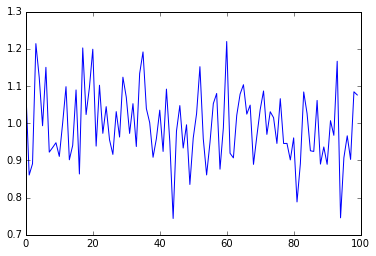

In [3]:
plt.plot (b)

In [4]:
b = b + 1

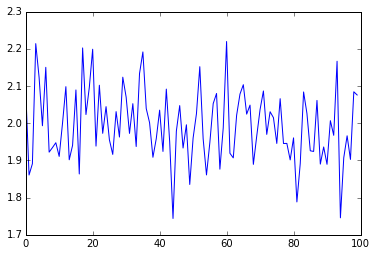

In [5]:
plt.plot (b)

In [43]:
b = 0.01*(b + 1) +2

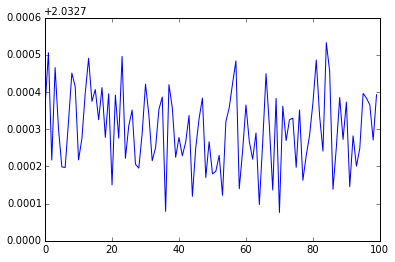

In [44]:
plt.plot (b)

## Funciones Universales de numpy

Ver más Tentative Numpy Tutorial [link](http://wiki.scipy.org/Tentative_NumPy_Tutorial)

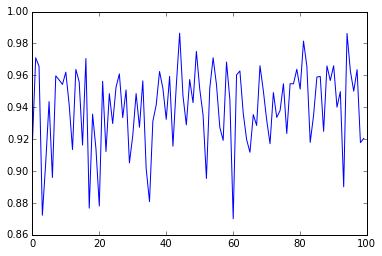

In [11]:
# Funciones anidadas
c = np.sin(np.sqrt(np.exp(c)))
plt.plot (c)

## Caminata aletoria

In [107]:
position = 0
walk = [position]
steps = 1000
for i in range(steps):
    step = 1 if np.random.randint(0, 2) else -1
    position += step
    walk.append(position)

In [ ]:
plt.plot (walk)

In [109]:
import random
position = 0
walk = [position]
steps = 1000
for i in range(steps):
    step = 1 if random.randint(0, 1) else -1
    position += step
    walk.append(position)

## Vectorización

##### Es el proceso de convertir una implementación escalar de una función, que procesa cada uno de los pares de operandos, en una implementación vectorial de la misma función que procesa el par de vectores de una sola vez

0.0
[ 0.          0.          0.          0.92002604  0.          0.
  0.93953006  0.97834055  0.          0.        ]


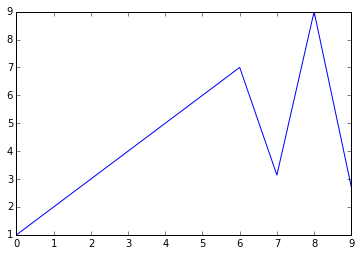

In [40]:
xs = np.array([1, 2, 3, 4, 5, 6, 7, np.pi, 9, np.e], float)


def vect_trivial (x, y):    
    z = np.sin ((x + y)**2)
    z = z * 2

vect_trivial(xs, xs)


def sin_add_square(x, y):
    z = np.sin ((x + y)**2)
    if z <= 0.0:
        z = 0.0
    return z
    
print(sin_add_square(2,3))



'''
Así se produce un error
la función no está definida  para
arrays 
sin_add_square(xs, xs)
'''


vadd_square = np.vectorize(sin_add_square)

'''
Así está vectorizada y opera sobre los
arrays
'''
print(vadd_square(xs, xs))

plt.plot(xs)

In [46]:
def sinc(x): 
    if x == 0.0:
        return 1.0
    else:
        w = np.pi*x
        return np.sin(w) / w

In [44]:
vsync = np.vectorize (sinc)
vsync(xs)

array([  3.89804309e-17,  -3.89804309e-17,   3.89804309e-17,
        -3.89804309e-17,   3.89804309e-17,  -3.89804309e-17,
         3.89804309e-17,  -4.35986286e-02,   3.89804309e-17,
         9.06284277e-02])

## Sistemas Lineales Invariantes en el tiempo

$H(s) = \frac {1}{s^2+6s+25}$

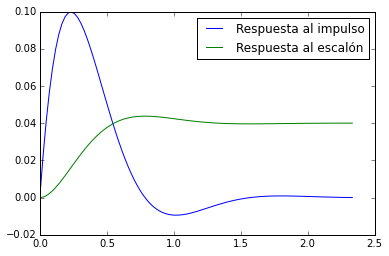

In [45]:
import scipy.signal as sgn

b,a = [1],[1,6,25]
sis = sgn.lti(b,a) 
t,h = sis.impulse()
ts,s = sis.step()
plt.plot(t,h,ts,s)
plt.legend(['Respuesta al impulso','Respuesta al escalón'])

In [168]:
w, mag, phase = sis.bode()

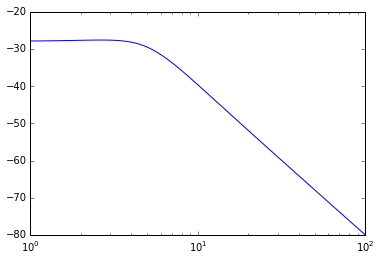

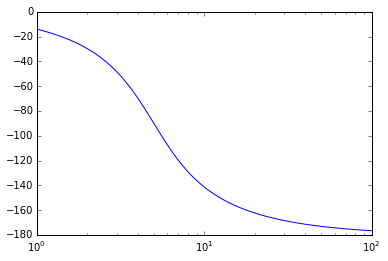

In [169]:
plt.figure()
plt.semilogx(w, mag)    # Bode magnitude plot
plt.figure()
plt.semilogx(w, phase)  # Bode phase plot
plt.show()

In [188]:
print ("A:",  sis.A)
print ("\n---\nB: ", sis.B)
print ("\n---\nC:",  sis.C)
print ("\n---\nD:",  sis.D)

A: [[ -6. -25.]
 [  1.   0.]]

---
B:  [[ 1.]
 [ 0.]]

---
C: [[ 0.  1.]]

---
D: [ 0.]


## Resolución de ecuaciones diferenciales

$a_n\frac{d^ny}{dt^n }+ a_{n-1}\frac{d^{n-1}y}{dt^{n-1}} + \dots + a_1 \frac {dy}{dt} + a_0 y= u(t)$

Transformando con Laplace

$a_ns^ny(s) + a_{n-1}s^{n-1}y(s) + \dots + a_1sy(s) + a_0 y= u(s)$

$(a_ns^n + a_{n-1}s^{n-1} + \dots + a_1s + a_0)y(s)= u(s)$

$\frac{y(s)}{u(s) }= \frac{1}{a_ns^n + a_{n-1}s^{n-1} + \dots + a_1s +a_0}$

Generalizando

$a_n\frac{d^ny}{dt^n }+ a_{n-1}\frac{d^{n-1}y}{dt^{n-1}} + \dots + a_1 \frac {dy}{dt} + a_0y= b_m\frac{d^mu}{dt^m }+ b_{m-1}\frac{d^{m-1}u}{dt^{m-1}} + \dots + b_1 \frac {du}{dt} + b_0u$, con $m$ < $n$

$\frac{y(s)}{u(s) }= \frac{b_ms^m + b_{m-1}s^{m-1} + \dots + b_1s+b_0}{a_ns^n + a_{n-1}s^{n-1} + \dots + a_1s+a_0}$

## Representación matricial de un sistema LTI

### Representación en el espacio de estados de un sistema físico lineal

Ver: State Space Representations of Linear Physical Systems  [link](http://lpsa.swarthmore.edu/Representations/SysRepSS.html)

$ \dot {\mathbf{x}} = \mathbf{A}\mathbf{x} + \mathbf{B}\mathbf{u} $

$ \mathbf{y} = \mathbf{C}\mathbf{x} +  \mathbf{D}\mathbf{u}$

Ejemplo

$\frac {d^4y}{dt^4} + a_1 \frac{d^3y}{dt^3} + a_2 \frac{d^2y}{dt^2} + a_1 \frac{dy}{dt} +a_0y = b_0 u $

$x_1 = y$

$x_2 = \dot{x_1} = \frac{dy}{dt} $

$x_3 = \dot{x_2} = \frac{d^2y}{dt^2} $

$x_4 = \dot{x_3} = \frac{d^3y}{dt^3} $

$\frac {d^4y}{dt^4} + a_1 x_4 + a_2 x_3 + a_1 x_2 +a_0x_1 = b_0 u $



$\dot{x_4} = \frac{d^4y}{dt^4} $


$\dot{x_4} = a_1 x_4 - a_2 x_3 - a_1 x_2 - a_0x_1 + b_0 u $


$\begin{pmatrix}
\mathbf{\dot{x}}_1 \\ \mathbf{\dot{x}}_2 \\ \mathbf{\dot{x}}_3 \\ \mathbf{\dot{x}}_4
\end{pmatrix}=
\begin{pmatrix}
0\ \ \ 1\ \ \ 0\ \ \ 0\\
0\ \ \ 0\ \ \ 1\ \ \ 0\\
0\ \ \ 0\ \ \ 0\ \ \ 1\\
-a_4 -a_3 -a_2 -a_1
\end{pmatrix}  
\begin{pmatrix}
\mathbf{x}_1 \\ \mathbf{x}_2 \\ \mathbf{x}_3 \\ \mathbf{x}_4
\end{pmatrix} +
\begin{pmatrix}
\mathbf{0} \\ \mathbf{0} \\ \mathbf{0} \\ \mathbf{b}_0
\end{pmatrix}\mathbf{u}$

$\mathbf{y} = \begin{pmatrix}1 \ 0  \ 0  \ 0 \end{pmatrix} \begin{pmatrix}\mathbf{x}_{1} \\ \mathbf{x}_{2} \\ \mathbf{x}_{3}  \\ \mathbf{x}_{4}\end{pmatrix}$
